# 1. Dataset Selection.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Obesity prediction.csv")

data

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [2]:
unique = data["Obesity"].unique()

unique

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [4]:
stats = data.describe()
stats

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# 2. Data Preprocessing.

### - Identify and Handle Missing Values.
    There are no missing values to handle.

In [5]:
data.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

### - Implement data cleaning, formatting, and organization to prepare your dataset for training.

In [6]:
# Checking for duplicates.
data.duplicated().sum()

24

In [7]:
# Dropping duplicate rows.
data_cleaned = data.drop_duplicates()

In [8]:
data_cleaned.duplicated().sum()

0

# 3. Feature Engineering.

### Encoding Categorical columns.

In [9]:
# Convert target variable to a categorical datatype.
data_cleaned["Obesity"] = data_cleaned["Obesity"].astype("category")

# Encode the target variable.
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() #instantiate the label encoder class

data_cleaned["Obesity"] = encoder.fit_transform(data_cleaned["Obesity"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_14224\1632161417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Obesity"] = data_cleaned["Obesity"].astype("category")
C:\Users\DELL\AppData\Local\Temp\ipykernel_14224\1632161417.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Obesity"] = encoder.fit_transform(data_cleaned["Obesity"])


In [10]:
#Retrieving and Saving all categorical data into a variable
categories = data_cleaned.select_dtypes(include="object").columns

categories

Index(['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
       'MTRANS'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder

for col in categories: 
    print(f"Encoding {col}") 
    data_cleaned.loc[:, col] = encoder.fit_transform(data_cleaned[col])

Encoding Gender
Encoding family_history
Encoding FAVC
Encoding CAEC
Encoding SMOKE
Encoding SCC
Encoding CALC
Encoding MTRANS


### Creating New Features.

In [12]:
import numpy as np

# 1. Calculate Body Mass Index (BMI)
data_cleaned["BMI"] = data["Weight"] / (data_cleaned["Height"] / 100) ** 2

# 2. Categorize age into age groups
data_cleaned["AGE_GROUP"] = pd.cut(data_cleaned["Age"], bins=[0, 18, 30, 50, np.inf], labels=["Child", "Young Adult", "Adult", "Senior"])
data_cleaned["AGE_GROUP"] = encoder.fit_transform(data_cleaned["AGE_GROUP"])

# 3. Creating a binary feature indicating high physical activity
data_cleaned["HIGH_PHYSICAL_ACTIVITY"] = (data_cleaned["FAF"] > 2).astype(int)

# 4. Creating a feature indicating high water consumption
data_cleaned["HIGH_WATER_CONSUMPTION"] = (data_cleaned["CH2O"] > 2).astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14224\2554969239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["BMI"] = data["Weight"] / (data_cleaned["Height"] / 100) ** 2
C:\Users\DELL\AppData\Local\Temp\ipykernel_14224\2554969239.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["AGE_GROUP"] = pd.cut(data_cleaned["Age"], bins=[0, 18, 30, 50, np.inf], labels=["Child", "Young Adult", "Adult", "Senior"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_14224\2554969239.py:8: SettingWi

In [13]:
data_cleaned

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,MTRANS,Obesity,BMI,AGE_GROUP,HIGH_PHYSICAL_ACTIVITY,HIGH_WATER_CONSUMPTION
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,...,0,0.000000,1.000000,3,3,1,243865.264441,3,0,0
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,...,1,3.000000,0.000000,2,3,1,242382.271468,3,1,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,...,0,2.000000,1.000000,1,3,1,237654.320988,3,0,0
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,...,0,2.000000,0.000000,1,4,5,268518.518519,3,0,0
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,...,0,0.000000,0.000000,2,3,6,283423.810125,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,...,0,1.676269,0.906247,2,3,4,449014.750007,3,0,0
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,...,0,1.341390,0.599270,2,3,4,437419.233525,3,0,1
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,...,0,1.414209,0.646288,2,3,4,435438.165841,3,0,1
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,...,0,1.139107,0.586035,2,3,4,440715.354033,3,0,1


# 4. Data Visualization.

### - Correlation Heatmap.

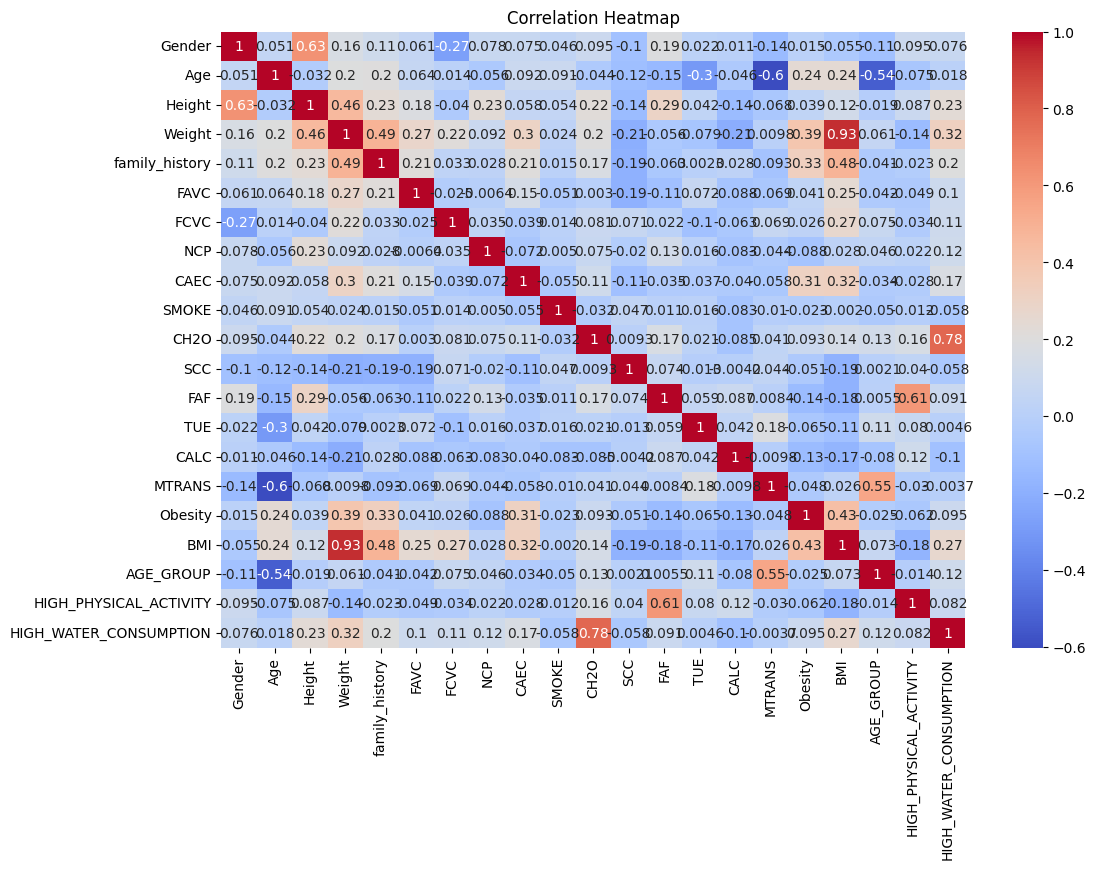

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### - Box Plot.

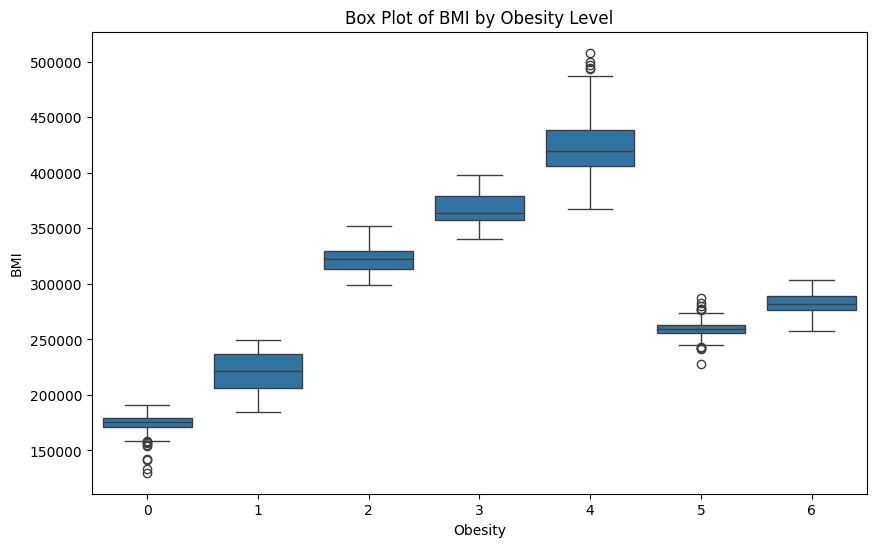

In [15]:
# Box plot for BMI by Obesity level
plt.figure(figsize=(10, 6))
sns.boxplot(x = "Obesity", y = "BMI", data = data_cleaned)
plt.title("Box Plot of BMI by Obesity Level")
plt.show()

### - Distribution Plot.

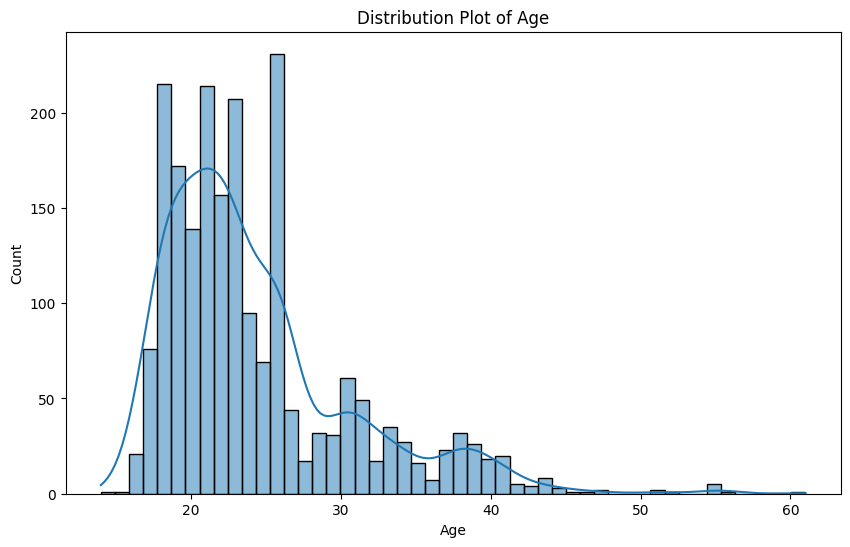

In [16]:
# Distribution plot for Age
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned["Age"], kde = True)
plt.title("Distribution Plot of Age")
plt.show()

# 5. Model Selection.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

features = data_cleaned.drop("Obesity", axis=1)
label = data_cleaned["Obesity"]

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

model = RandomForestClassifier()
model.fit(x_train, y_train)
print("Model trained successfully")

Model trained successfully


# 6.  Model Evaluation.

### - Evaluate Model Performance.

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(x_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.992822966507177
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       0.98      0.98      0.98        55
           2       0.99      1.00      0.99        76
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        66
           5       1.00      0.98      0.99        55
           6       1.00      0.98      0.99        54

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



### - Confusion Matrix.

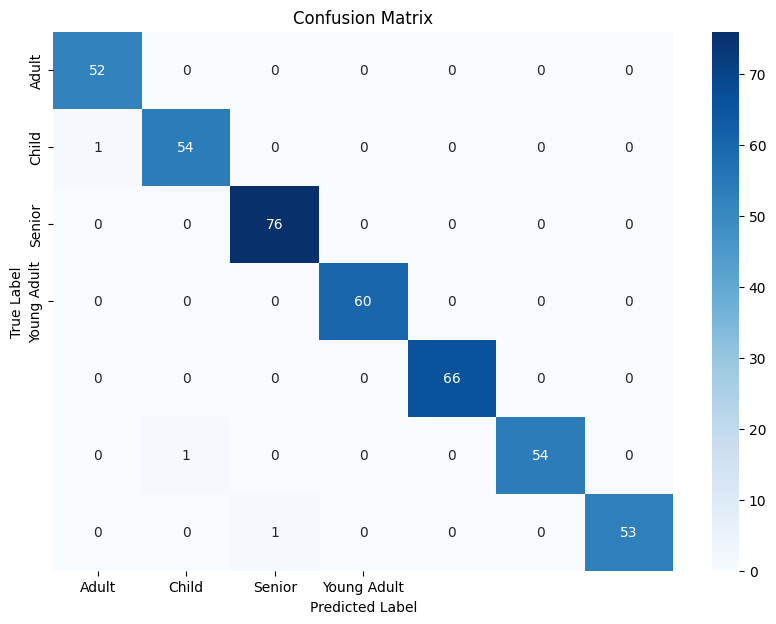

In [19]:
# Make predictions
y_pred = model.predict(x_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt = "d", cmap = "Blues", xticklabels = encoder.classes_, yticklabels = encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### - Using appropriate methods for evaluation (GridSearchCV).

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30]
}
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]})

### Justification for Model Selection: Random Forest Classifier

**1. Nature of the Problem:**
- The task is a multi-class classification problem, where we need to predict the obesity level of individuals based on various health-related features.
- Random Forest is inherently suited for classification tasks, including multi-class classification, making it a suitable choice for this problem.

**2. Handling High-Dimensional Data:**
- The dataset contains a mix of numerical and categorical features. Random Forest can handle high-dimensional data and automatically performs feature selection, making it robust to irrelevant features.
- This capability ensures that the model focuses on the most informative features, improving overall performance.

**3. Interpretability and Feature Importance:**
- Random Forest provides insights into feature importance, allowing us to understand which features contribute the most to the prediction.
- This interpretability is valuable for healthcare-related projects, where understanding the impact of different features on the prediction is crucial.

**4. Robustness to Overfitting:**
- Random Forest is an ensemble method that combines multiple decision trees to reduce the risk of overfitting.
- By aggregating the results of several trees, the model generalizes better to unseen data, ensuring more reliable predictions.

**5. Flexibility and Scalability:**
- Random Forest is flexible and can handle both classification and regression tasks. It scales well with large datasets and is computationally efficient.
- This scalability is essential when dealing with a large dataset like the Obesity Prediction dataset.

**6. Performance:**
- Random Forest tends to achieve high accuracy and performs well across various datasets and tasks.
- By using cross-validation and hyperparameter tuning, we can further optimize the model to achieve the best performance.

### Summary
- **Robustness**: Handles high-dimensional data, reduces overfitting, and provides feature importance.
- **Flexibility**: Suitable for multi-class classification, scalable, and computationally efficient.
- **Performance**: Achieves high accuracy with optimization techniques.

Given these advantages, the Random Forest classifier is a strong choice for predicting obesity levels in individuals based on the provided dataset.

### - Challenges faced during the Project.

### - Building a model to predict obesity using a RandomForestClassifier on a high-dimensional dataset posed several challenges:

1. **Curse of Dimensionality**: With high-dimensional data, the number of features were a bit complex, leading to increased computational complexity and risk of overfitting.
2. **Feature Selection**: Identifying and selecting the most relevant features from a vast pool can be tricky. Irrelevant features can reduce model performance.
3. **Data Imbalance**: If the dataset has an imbalance in classes (e.g., more non-obese than obese individuals), it can bias the model towards the majority class, leading to poor performance on the minority class. Also it was a multi-classed dataset.
4. **Feature Correlation**: High-dimensional datasets may contain correlated features, which can affect the performance of the RandomForestClassifier. Techniques like feature engineering or dimensionality reduction (e.g., PCA) were necessary.
5. **Interpretability**: While RandomForest provides feature importance, interpreting the results of high-dimensional data can still be challenging.
6. **Data Quality**: Ensuring the dataset is clean, accurate, and free of missing values or outliers is essential for building a robust model.
7. **Scalability**: Training on a high-dimensional dataset can be time-consuming and require significant computational resources.

Addressing these challenges often involves using techniques like feature selection, dimensionality reduction, resampling methods, and thorough data preprocessing. It was a complex but rewarding process! 🌟

# - What dataset did you use?

### I used the RandomForestClassifier.

# - Explain your project! I want to see the thinking behind the code essentially.

### Project Overview
**Objective:** Build a predictive model to determine whether a person is obese or not based on various features using a RandomForestClassifier.

The project was of interest to me due to my past experience as a chef, and recent motivation to live healthy. With analysis like this, it can be easier to deal with the problems of obesity.

### Steps and Thinking:

1. **Data Collection and Understanding:**
   - Gather data related to factors that can influence obesity (e.g., age, gender, BMI, physical activity, diet, medical history).
   - Understand the dataset structure, types of features, and any potential issues like missing values or outliers.

2. **Data Preprocessing:**
   - **Cleaning:** Handle missing values, outliers, and erroneous data entries.
   - **Encoding:** Convert categorical variables into numeric format using techniques like One-Hot Encoding.
   - **Scaling:** Normalize numerical features to ensure they are on a similar scale, which can improve model performance.

3. **Exploratory Data Analysis (EDA):**
   - Analyze feature distributions and relationships using visualizations.
   - Identify potential correlations between features and the target variable (obesity).
   - Detect and address any imbalanced classes if present.

4. **Feature Engineering and Selection:**
   - **Creation:** Generate new features that may improve model performance (e.g., interaction terms, polynomial features).
   - **Selection:** Use techniques like Recursive Feature Elimination (RFE) or feature importance scores to select the most relevant features and reduce dimensionality.

5. **Model Building:**
   - **Initialization:** Instantiate a RandomForestClassifier with appropriate hyperparameters.
   - **Training:** Train the model on the training dataset.
   - **Validation:** Validate the model using cross-validation to ensure it generalizes well to unseen data.

6. **Hyperparameter Tuning:**
   - Use techniques like GridSearchCV or RandomizedSearchCV to find the optimal hyperparameters for the RandomForestClassifier.

7. **Model Evaluation:**
   - **Metrics:** Evaluate the model using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
   - **Interpretation:** Analyze feature importance scores provided by the RandomForestClassifier to understand the impact of each feature.

8. **Deployment and Monitoring:**
   - Deploy the model to a production environment where it can be used to make predictions on new data.
   - Monitor the model's performance over time and retrain it as necessary to maintain accuracy.

This project encapsulates a comprehensive approach to building a predictive model for obesity using a high-dimensional dataset. Each step is crucial to ensure the model's reliability and effectiveness.